#### Risques Cardio-Vasculaires

#### 1. Réaliser une veille sur les Random Forest.

#### Notion de bagging :
Les Random Forest peuvent être composées de plusieurs dizaines voire centaines d’arbres, le nombre d’arbre est un paramètre que l’on ajuste généralement par validation croisée (ou cross-validation en anglais). Pour faire court, la validation croisée est une technique d’évaluation d’un algorithme de Machine Learning consistant à entrainer et tester le modèle sur des morceaux du dataset de départ.

#### 2. 3. Visualiser et analyser les données avec les librairies Matplotlib et Seaborn.

In [11]:
# Import Pandas
import pandas as pd
import numpy as np

# Load Movies Metadata
#data = pd.read_csv('cardio_train.csv', low_memory=False)
data = pd.read_csv('cardio_train.csv', sep=';')

# Print the first three rows
data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [2]:
data.shape

(70000, 13)

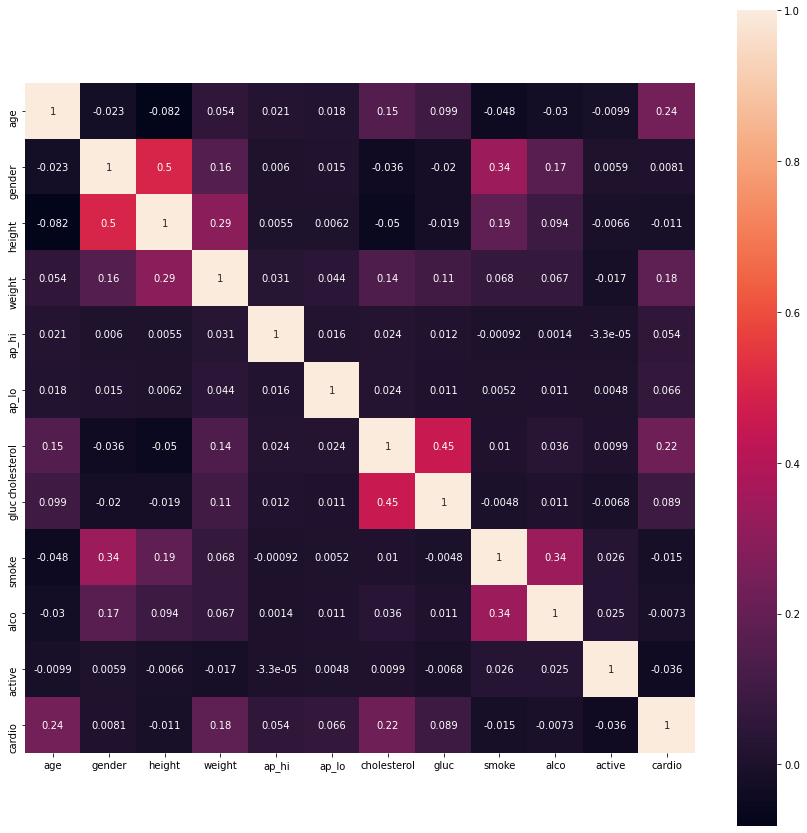

In [3]:
import seaborn as sn
import matplotlib.pyplot as plt

# matrice de correlation sur les caracteristiques (mean)
features = ['age','gender','height','weight','ap_hi', 'ap_lo', 'cholesterol','gluc', 'smoke', 'alco','active','cardio']
plt.figure(figsize=(15,15))
heat = sn.heatmap(data[features].corr(), vmax=1, square=True, annot=True)

In [164]:
import pandas_profiling

#pandas_profiling.ProfileReport(data)

#### 4. Résoudre le cas d’étude présenté ci-dessus avec la librairie Scikit-Learn 
(exploration des données, préparation des données, modélisation, le test et l’interprétation des résultats).

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X = data.drop(['id','cardio'], axis=1)
y = data['cardio']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 70% training and 30% test

rf = RandomForestClassifier(random_state=None)

rf.fit(X_train, y_train)

#Calcul de la performance du RandomForest en cross-validation
score = cross_val_score(rf, X_test, y_test,cv=5)
print ("Sur ce jeu de données, le taux de succès en classification moyen de :",round(score.mean(),3))

Sur ce jeu de données, le taux de succès en classification moyen de : 0.72


In [5]:
print('accuracy_score : ',round(rf.score(X_test,y_test),3))

accuracy_score :  0.717


#### Avec les données scalées :

In [6]:
#scalar:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Split dataset into training set and test set
X_trains, X_tests, y_trains, y_tests = train_test_split(scaled_X, y, test_size=0.25) # 70% training and 30% test

rfs = RandomForestClassifier(random_state=42)

rfs.fit(X_trains, y_trains)

RandomForestClassifier(random_state=42)

#### Importance des features :

In [7]:
from sklearn.ensemble import AdaBoostClassifier

def feature_importances(clfs):
    for i, clf in enumerate(clfs):        
        importances = clf.feature_importances_
        indices = np.argsort(importances)
        # style du graphique 
        plt.style.use('fivethirtyeight')
        %matplotlib inline
        plt.subplot(210+i+1)
        plt.title('Feature Importances')
        plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        plt.yticks(range(len(indices)), [features[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()

#### An AdaBoost classifier

In [8]:
adaB = AdaBoostClassifier(n_estimators=100, random_state=0)
adaB.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [9]:
adaBs = AdaBoostClassifier(n_estimators=100, random_state=0)
adaBs.fit(X_trains, y_trains)

AdaBoostClassifier(n_estimators=100, random_state=0)

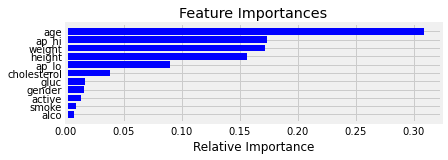

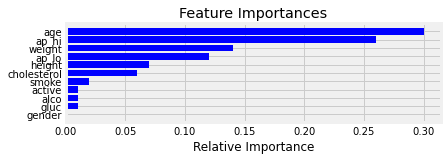

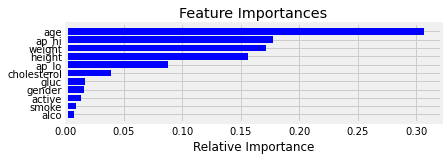

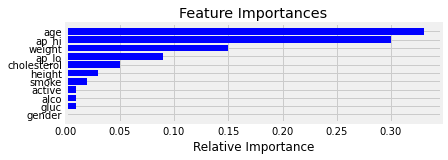

In [12]:
clfs1 = [rf,adaB]
clfs2 = [rfs,adaBs]
feature_importances(clfs1)
feature_importances(clfs2)

In [13]:
from sklearn.metrics import classification_report

pred = rf.predict(X_test)
target_names = ['class_0','class_1']

print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.71      0.73      0.72      8701
     class_1       0.73      0.70      0.71      8799

    accuracy                           0.72     17500
   macro avg       0.72      0.72      0.72     17500
weighted avg       0.72      0.72      0.72     17500



#### Avec les données scalées:

In [14]:
from sklearn.metrics import classification_report

preds = rfs.predict(X_tests)
target_names = ['class_0','class_1']

print(classification_report(y_tests, preds, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.70      0.74      0.72      8712
     class_1       0.73      0.69      0.71      8788

    accuracy                           0.71     17500
   macro avg       0.71      0.71      0.71     17500
weighted avg       0.71      0.71      0.71     17500



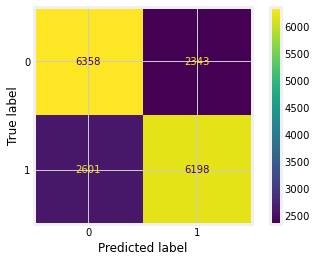

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

conf_matrix = confusion_matrix(y_test, pred)
plot_confusion_matrix(rf, X_test, y_test)  

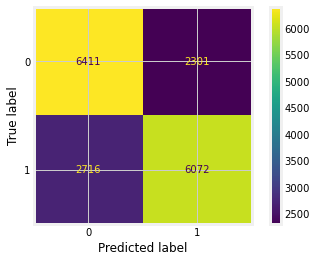

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

conf_matrix_s = confusion_matrix(y_tests, preds)
plot_confusion_matrix(rfs, X_tests, y_tests)  

In [22]:
# Parmi les vraies valeurs en 0, 73 sont predites en 0 , 2 sont en erreur
Null_accuracy  = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1])
print('null_accuracy : ',round(Null_accuracy,3))

# Parmi les vraies valeurs en 1, 38 sont bien predites et 1 est en erreur
One_accuracy  = conf_matrix[1][1]/(conf_matrix[1][0]+conf_matrix[1][1])
print('one_accuracy : ',round(One_accuracy,3))

null_accuracy :  0.731
one_accuracy :  0.704


In [23]:
# Parmi les vraies valeurs en 0, 73 sont predites en 0 , 2 sont en erreur
Null_accuracy_s  = conf_matrix_s[0][0]/(conf_matrix_s[0][0]+conf_matrix_s[0][1])
print('null_accuracy : ',round(Null_accuracy,3))

# Parmi les vraies valeurs en 1, 38 sont bien predites et 1 est en erreur
One_accuracy_s  = conf_matrix_s[1][1]/(conf_matrix_s[1][0]+conf_matrix_s[1][1])
print('one_accuracy : ',round(One_accuracy_s,3))

null_accuracy :  0.731
one_accuracy :  0.691


#### 5. Prédire si Arthur 53 ans, fumeur, sportif, 175 cm, 85 kg, 
avec un taux de cholestérol au dessus de la normal et un taux de glucose normal, une tension artérielle systolique dans la moyenne et une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données, est un sujet à risques cardio-vasculaires.


In [24]:
import numpy as np

# calcul de la moyenne du 3e quartile de la pression sanguine diastolique
# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = round(np.percentile(data['ap_lo'], 75))
Q1 = round(np.percentile(data['ap_lo'], 25))
mediane = round(np.percentile(data['ap_lo'], 50))
print("Quartile Q3 vaut : ", Q3)
print("Quartile Q1 vaut : ", Q1)
print("Quartile mediane vaut : ", mediane)

Quartile Q3 vaut :  90
Quartile Q1 vaut :  80
Quartile mediane vaut :  80


In [70]:
X  = [[53 * 365, 2, 175, 85.0, 129, 90, 2, 1, 1, 1, 1]]
print(rf.predict(X))

[1]


#### Avec les données scalées :

In [71]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
print(rfs.predict(scaled_X))

[0]


#### Comparaison avec d'autres algorithme de ML: Neural Network

In [66]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), max_iter = 1000, random_state=42)
mlp.fit(X_train, y_train)

/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=42, solver='lbfgs')

#### 5. Prédire si Arthur 53 ans, fumeur, sportif, 175 cm, 85 kg,

avec un taux de cholestérol au dessus de la normal et un taux de glucose normal, une tension artérielle systolique dans la moyenne et une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données, est un sujet à risques cardio-vasculaires.

age 	gender 	height 	weight 	ap_hi 	ap_lo 	cholesterol 	gluc 	smoke 	alco 	active 	cardio

In [67]:
X  = [[53 * 365, 2, 175, 85.0, 129, 90, 2, 1, 1, 1, 1]]

print(mlp.predict(X))

[0]


In [68]:
mlps = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), max_iter = 1000, random_state=42)
scaled_X = scaler.fit_transform(X_train)
mlps.fit(X_train, y_train)

/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=42, solver='lbfgs')

In [69]:
X  = [[53 * 365, 2, 175, 85.0, 129, 90, 2, 1, 1, 1, 1]]

scaled_X = scaler.fit_transform(X)

print(mlps.predict(scaled_X))

[1]


In [30]:
pred = mlp.predict(X_test)
target_names = ['class_0','class_1']

print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.50      1.00      0.66      8701
     class_1       1.00      0.00      0.00      8799

    accuracy                           0.50     17500
   macro avg       0.75      0.50      0.33     17500
weighted avg       0.75      0.50      0.33     17500



In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [91]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=26).fit(X_train, y_train)

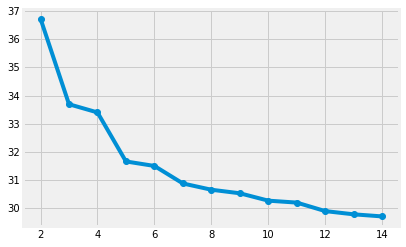

In [33]:
errors = []
for k in range(2,15):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

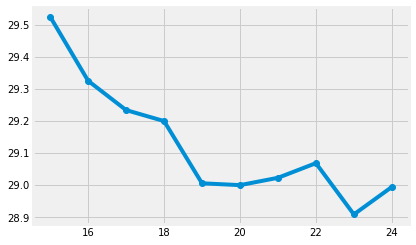

In [34]:
errors = []
for k in range(15,25):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(15,25), errors, 'o-')
plt.show()

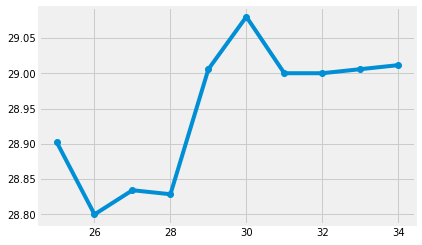

In [35]:
errors = []
for k in range(25,35):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(25,35), errors, 'o-')
plt.show()

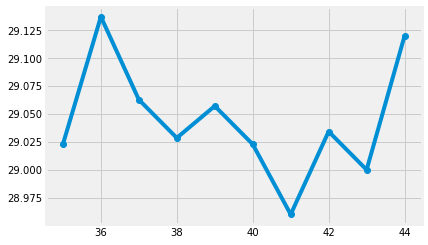

In [36]:
errors = []
for k in range(35,45):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(35,45), errors, 'o-')
plt.show()

In [72]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      8701
           1       0.75      0.63      0.69      8799

    accuracy                           0.71     17500
   macro avg       0.71      0.71      0.71     17500
weighted avg       0.71      0.71      0.71     17500



In [73]:
X  = [[53 * 365, 2, 175, 85.0, 129, 90, 2, 1, 1, 1, 1]]
pred = knn.predict(X)
pred

array([0])

In [38]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(max_iter=1000, tol=1e-3)
SGD.fit(X_train, y_train)

SGDClassifier()

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def benchmark_clf(clf):
    results_null = []
    results_one = []
    for clf in clfs:
        pred = clf.predict(X_test)
        conf_matrix = confusion_matrix(y_test, pred)
        
        Null_accuracy  = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1])
        results_null.append(round(Null_accuracy,3))
        
        One_accuracy  = conf_matrix[1][1]/(conf_matrix[1][0]+conf_matrix[1][1])
        results_one.append(round(One_accuracy,3))
        
    return results_null , results_one

In [87]:
def predict(clfs,X):
    preds = []
    for clf in clfs:
        preds.append(clf.predict(X))
    return preds   

In [92]:
X  = [[53 * 365, 2, 175, 85.0, 129, 90, 2, 1, 1, 1, 1]]
clfs = [rf, mlp, lr, SGD, knn]
results_null , results_one = benchmark_clf(clfs)
preds = predict(clfs,X)
res = pd.DataFrame([results_null , results_one, preds], index = ['Null_accuracy','One_accuracy','Prediction'], columns =['Random Forest','Neural Network MLP', 'Logistic Regression', 'Sgd','Knn'] )
res

,Random Forest,Neural Network MLP,Logistic Regression,Sgd,Knn
Null_accuracy,0.731,1,0.729,0.02,0.786
One_accuracy,0.704,0,0.669,0.997,0.639
Prediction,[1],[0],[0],[1],[0]


##### Avec les données scalées

In [93]:
X  = [[53 * 365, 2, 175, 85.0, 129, 90, 2, 1, 1, 1, 1]]

scaled_X = scaler.fit_transform(X)
predss = predict(clfs,scaled_X)
res_pred = pd.DataFrame([predss, preds], index = ['Prediction données non scalées', 'Prediction données scalées'], columns =['Random Forest','Neural Network MLP', 'Logistic Regression', 'Sgd','Knn'] )
res_pred

,Random Forest,Neural Network MLP,Logistic Regression,Sgd,Knn
Prediction données non scalées,[0],[1],[0],[0],[0]
Prediction données scalées,[1],[0],[0],[1],[0]


#### Test avec Grid Search :    

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning

import warnings

params = {
    'n_estimators': [20, 60, 80, 100],
    'max_depth': [None, 2],
    #'bootstrap' : [True, False],
    
}
warnings.filterwarnings("ignore", category=ConvergenceWarning)

grid = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=params, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.7min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 2],
                         'n_estimators': [20, 60, 80, 100]},
             verbose=1)

In [79]:
sorted(grid.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_bootstrap',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [94]:
#grid.cv_results_

In [95]:
grid.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=20)

In [96]:
grid.best_score_

0.7213904761904761

In [98]:
X = data.drop(['id','cardio'], axis=1)
y = data['cardio']
X_trains, X_tests, y_trains, y_tests = train_test_split(X, y, test_size=0.25) # 70% training and 30% test

rf = RandomForestClassifier(max_depth=2, n_estimators=20)

rf.fit(X_trains, y_trains)

RandomForestClassifier(max_depth=2, n_estimators=20)

In [99]:
pred = rf.predict(X_test)
target_names = ['class_0','class_1']

print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.68      0.81      0.74      8701
     class_1       0.77      0.63      0.69      8799

    accuracy                           0.72     17500
   macro avg       0.72      0.72      0.72     17500
weighted avg       0.72      0.72      0.72     17500

